# First runs with different river classification systems for testing

Just for year 2002

May, 2019

In [69]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")
import matplotlib.animation as animation
from matplotlib import rc

%matplotlib notebook

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

| Run ID    | River forcing file               |
|-----------|----------------------------------|
| riv_2a    | river_input-glacier-enhanced.nc  |
| riv_2b    | river_input-decrease-case.nc     |
| riv_2c    | river_input-increase-case.nc     |
| mn_test1f | river_input-base-case.nc         |

In [70]:
run_folder1= '/data/brogalla/run_storage/riv_2a/'
run_folder2= '/data/brogalla/run_storage/riv_2b/'
run_folder3= '/data/brogalla/run_storage/riv_2c/'
run_folder4= '/data/brogalla/run_storage/mn_test1f/'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'
fday_test = 'ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020804-20020808.nc'

Mask land values

In [71]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((12, 50, 570, 600))
tmask_full_ave[:]  = tmask

In [78]:
def load_monthly(storage, ave=monthly_ave, mask_ave=tmask_full_ave):
    
    test_ave  = nc.Dataset(storage+ave)
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    
    #apply land mask:
    cond_ave  = (mask_ave  < 0.1) 
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    
    return dmn_mave*10e9

In [77]:
def load_fday(storage, file, mask=tmask):
    
    test  = nc.Dataset(storage+file)
    dmn   = np.array(test.variables['dissolmn'])
    
    #apply land mask:
    cond  = (mask  < 0.1) 
    dmn_m = np.ma.masked_where(cond, dmn[0,:,:,:]) 
    
    return dmn_m*10e9

In [79]:
riv_2a_ave = load_monthly(run_folder1)
riv_2b_ave = load_monthly(run_folder2)
riv_2c_ave = load_monthly(run_folder3)
t1f_mn_ave = load_monthly(run_folder4)

In [80]:
riv_2a_fday = load_fday(run_folder1, fday_test)
t1f_mn_fday = load_fday(run_folder4, fday_test)

In [93]:
print(np.amax(riv_2a_ave[0:11,:,:,:]), np.amin(riv_2a_ave[0:11,:,:,:]), np.average(riv_2a_ave[0:11,:,:,:]))
print(np.amax(t1f_mn_ave[0:11,:,:,:]), np.amin(t1f_mn_ave[0:11,:,:,:]), np.average(t1f_mn_ave[0:11,:,:,:]))

1750.3456 0.0 36.379164753225574
1750.3456 0.0 36.379164753225574


Load the lons, lats, etc.

In [84]:
ref   = nc.Dataset(run_folder4+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


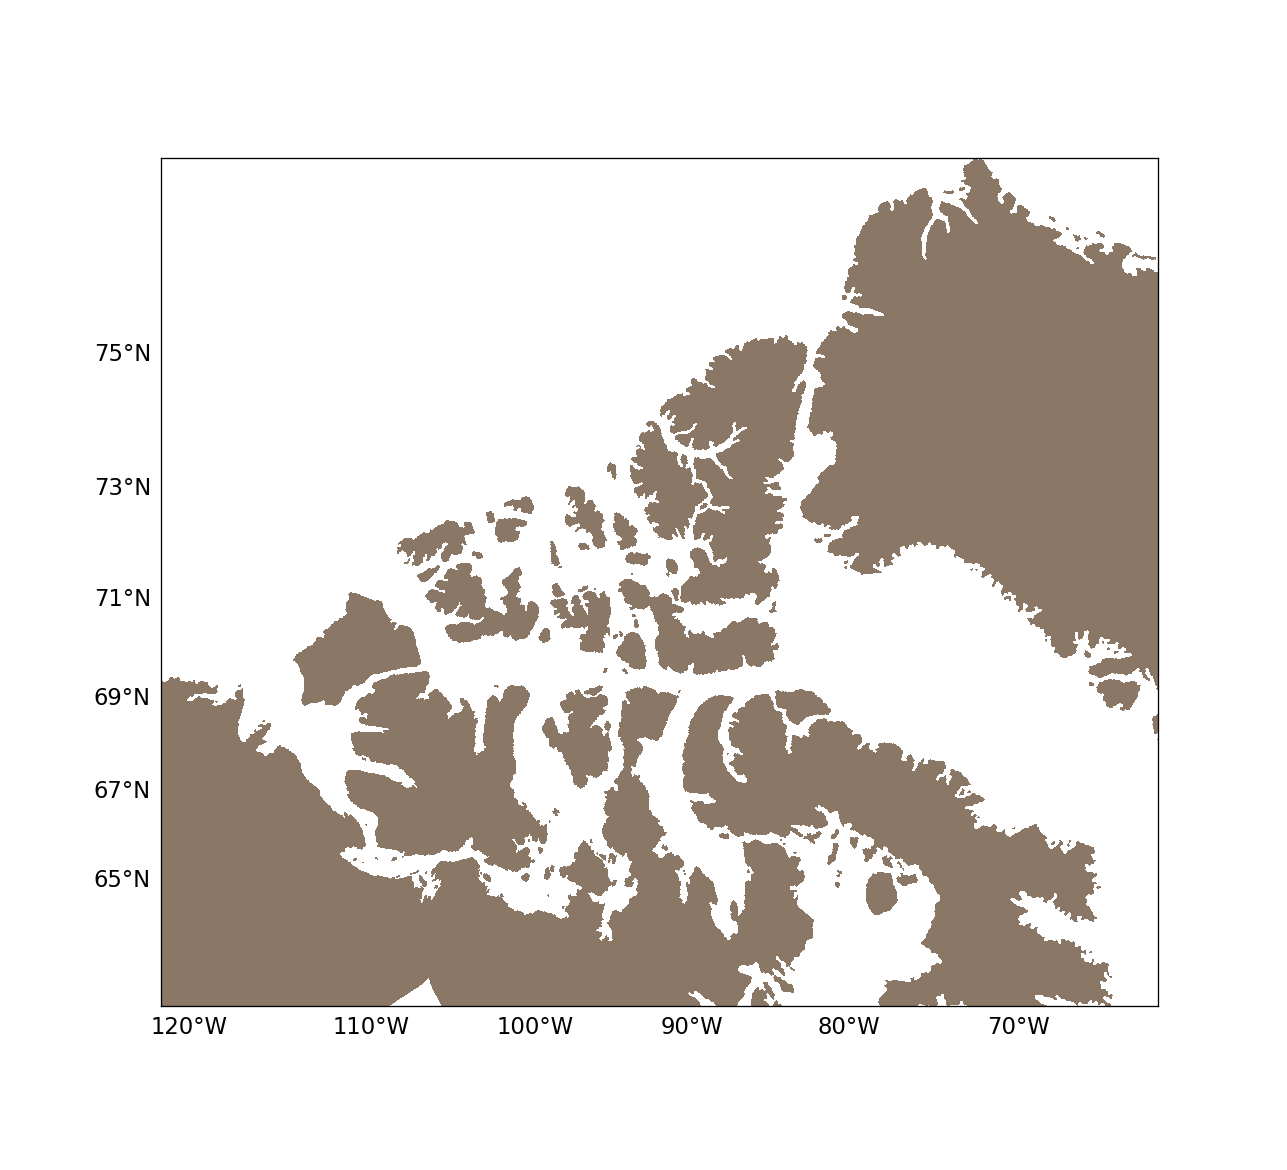

In [85]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [86]:
def months_overview(var, title, levels, min_v, max_v, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.balance
    cbar  = proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
#     proj.contourf(x, y, var[11, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)

    return

## Glacial river trace metal concentrations enhanced:

Does a 50% increase in trace metal concentrations flowing out of glacial rivers have a strong impact on the Mn signatures in the CAA? To answer this question: compare outputs from riv_2a and mn_test1f runs.

In [87]:
glacial_mn = riv_2c_ave - t1f_mn_ave

In [91]:
print(np.amax(glacial_mn[:,:,:,:]), np.amin(glacial_mn[:,:,:,:]), np.average(glacial_mn[:,:,:,:]))

12.247528 -11.660873 -0.0005160044659241138


<IPython.core.display.Javascript object>


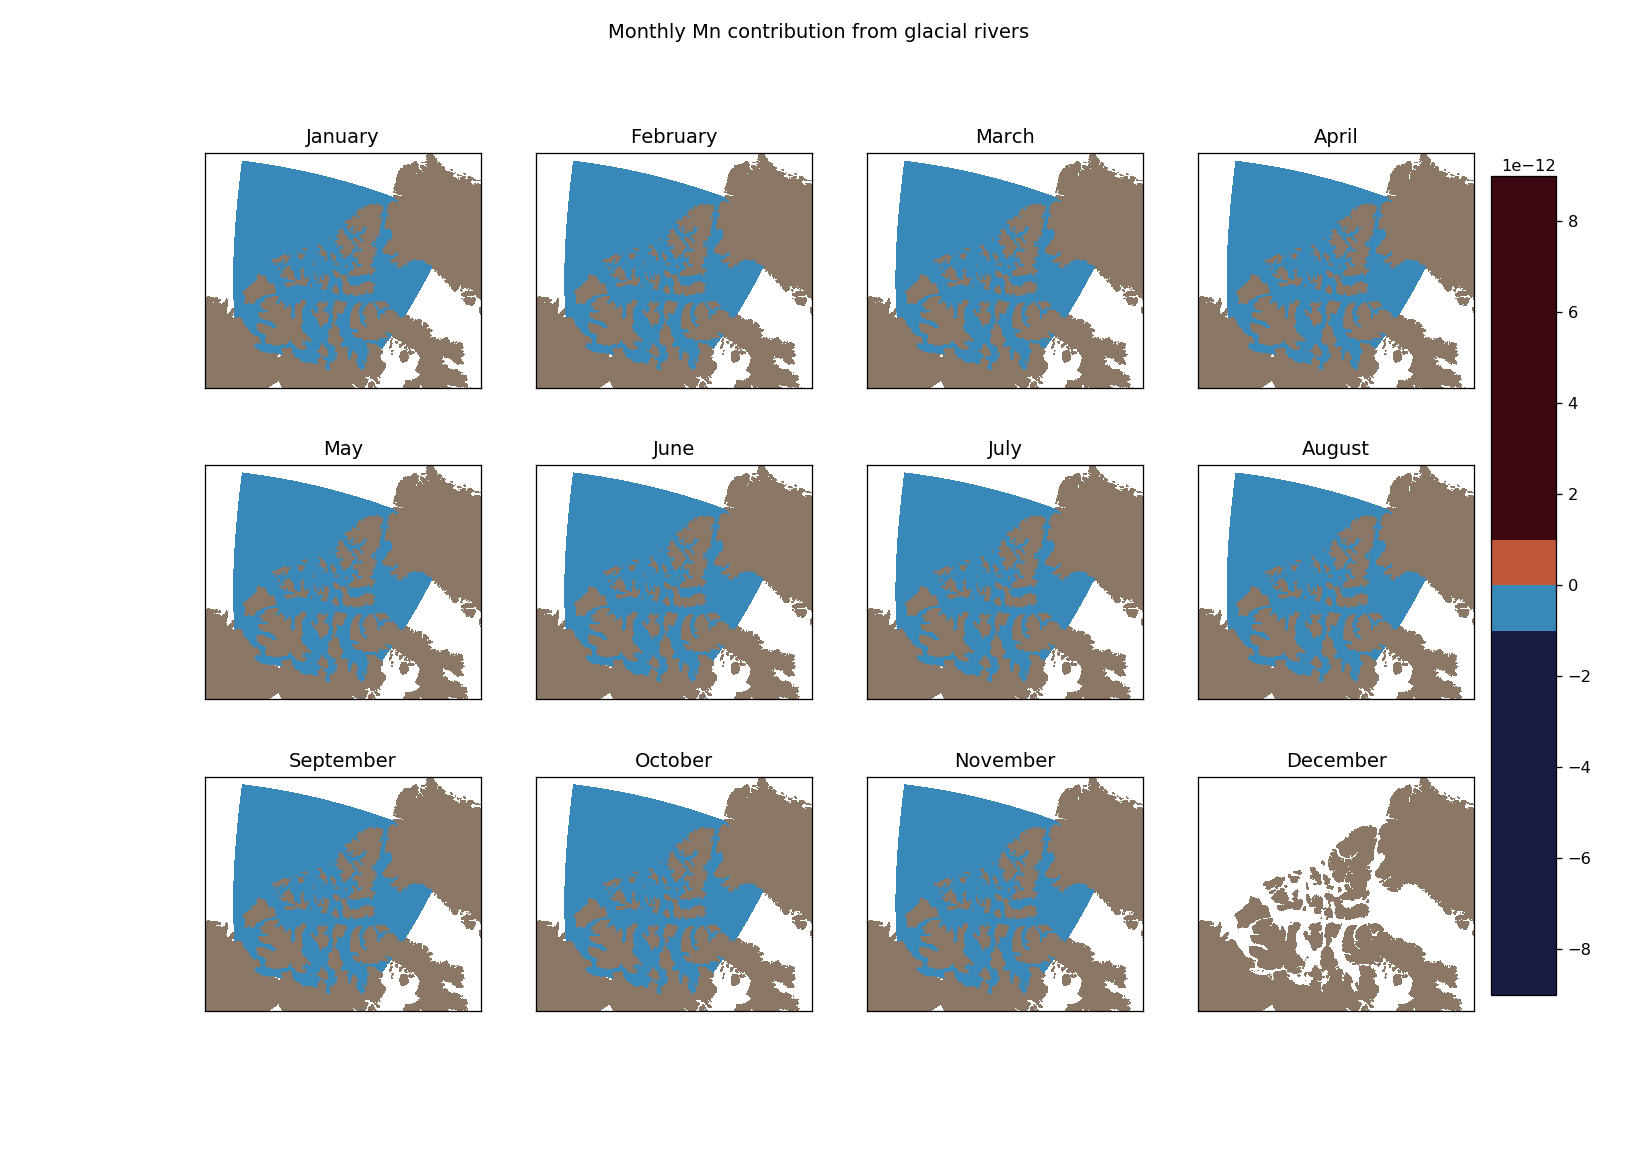

In [92]:
levels_ave = [-9e-12, -8e-12, -7e-12, -6e-12, -5e-12, -4e-12, -3e-12, -2e-12, -1e-12, 0, \
              1e-12, 2e-12, 3e-12, 4e-12, 5e-12, 6e-12, 7e-12, 8e-12, 9e-12]
vmin  = -1e-12
vmax  = 1e-12
months_overview(glacial_mn, 'Monthly Mn contribution from glacial rivers', levels_ave, vmin, vmax)

### Zoom into months July and August in 2003 to get a better look at the rivers

In [15]:
mn_diff_200307 = t1f_mn_diff[17,:,:,:]
mn_diff_200308 = t1f_mn_diff[18,:,:,:]

<IPython.core.display.Javascript object>


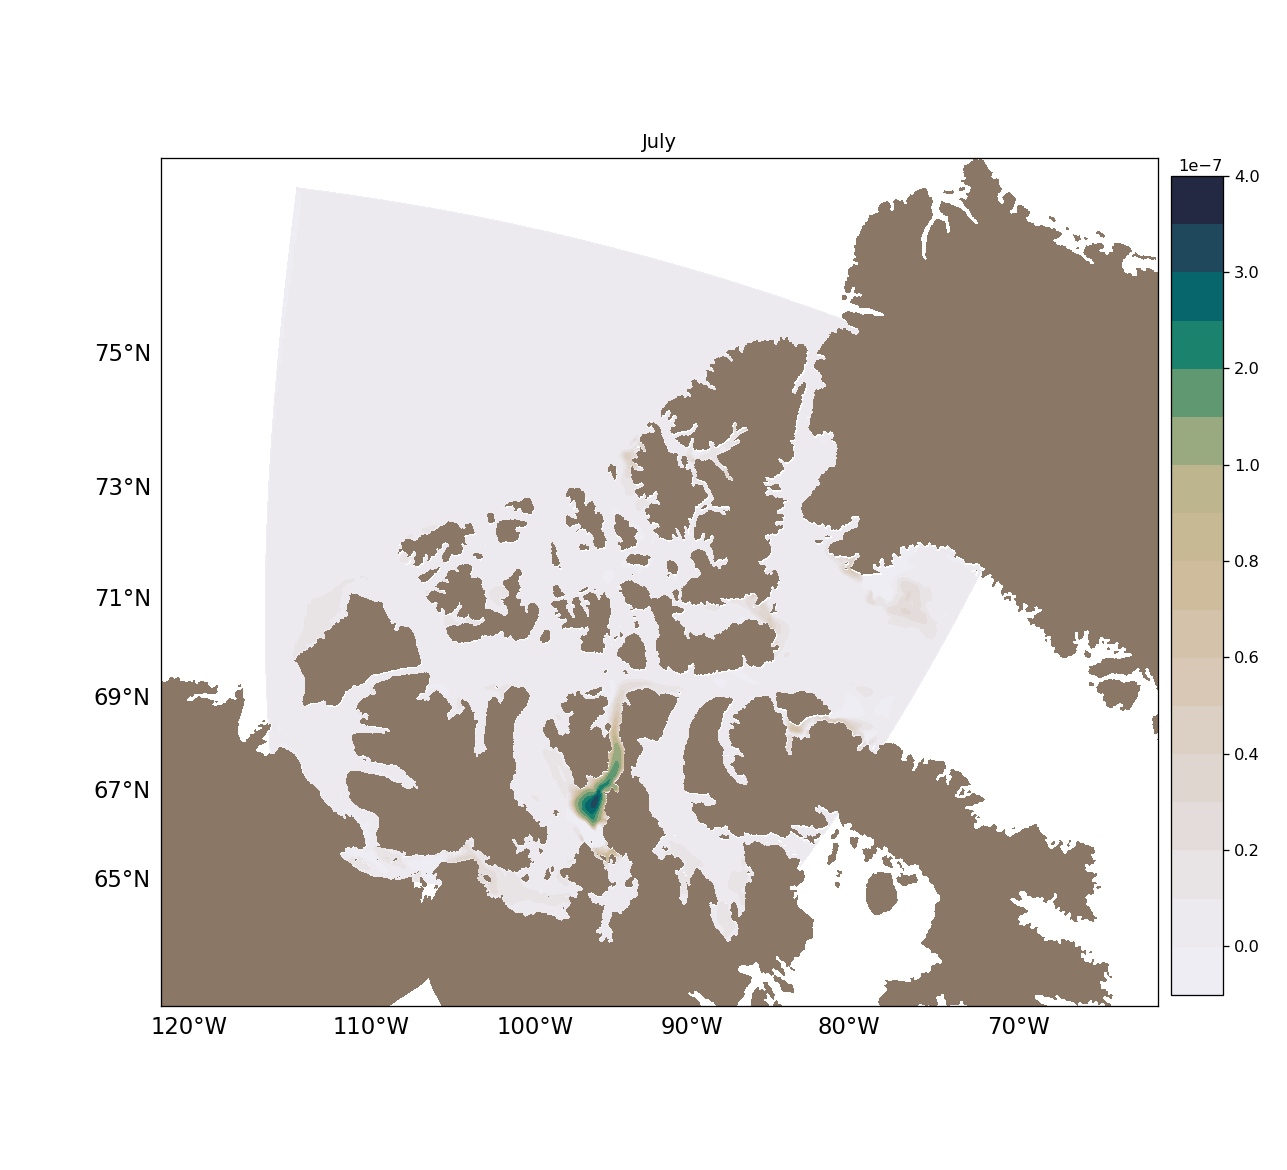

In [16]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_diff = [-6e-7, 0, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7, \
               1.5e-7, 2e-7, 2.5e-7, 3e-7, 3.5e-7, 4e-7]
min_v  = 0
max_v  = 4e-7
cbar = proj.contourf(x, y, mn_diff_200307[0,:,:], levels_diff, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('July')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


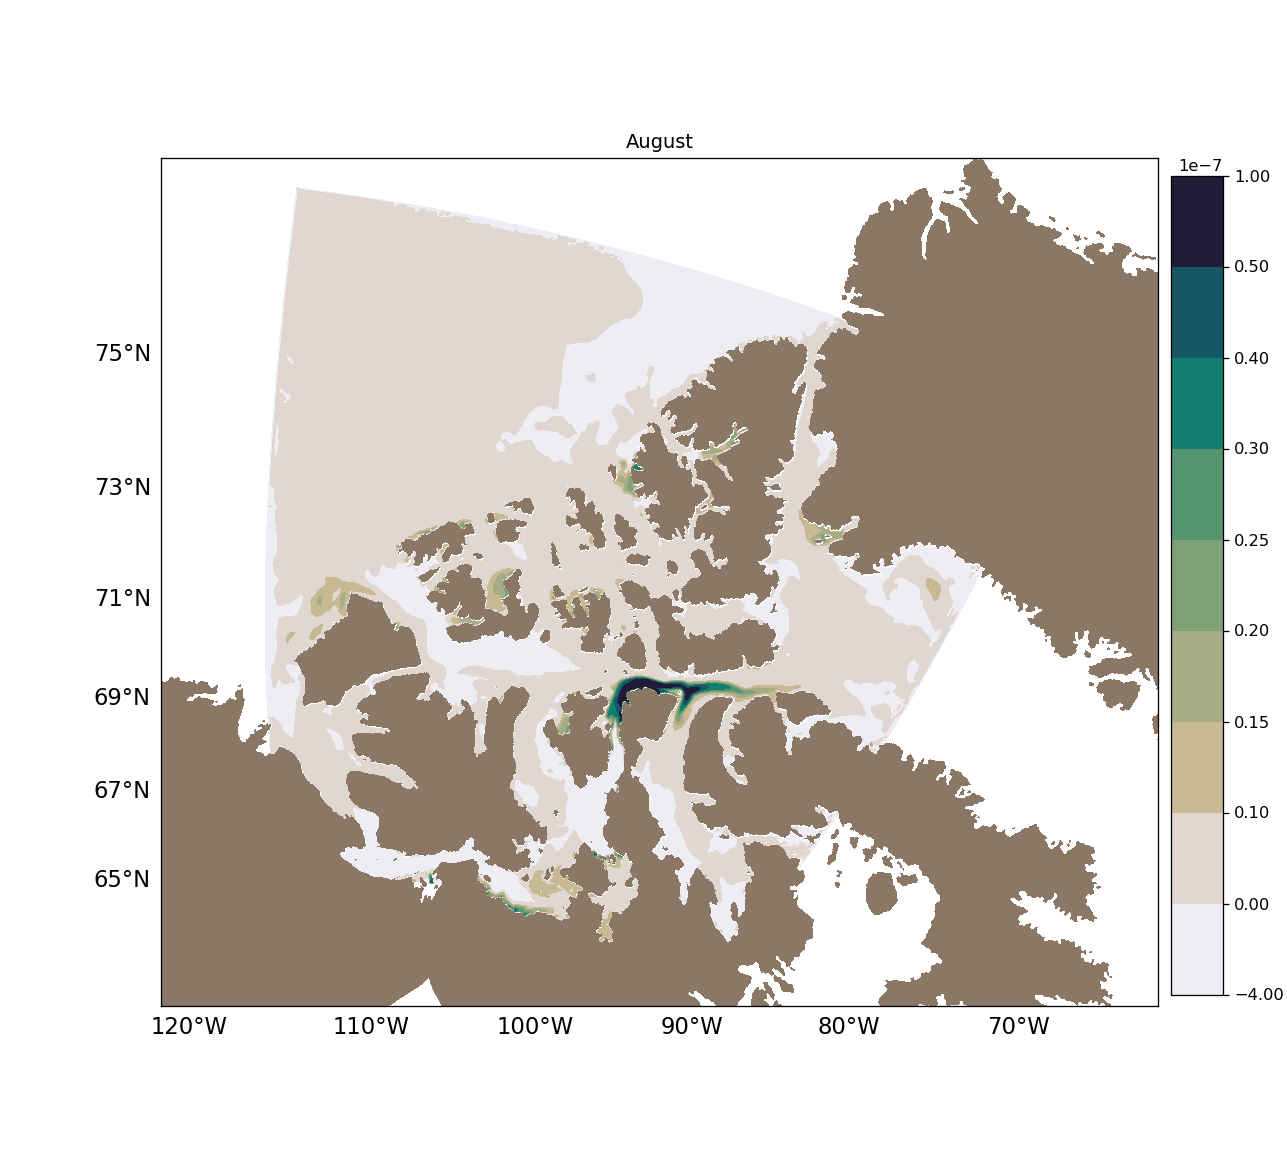

In [17]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_diff = [-4e-7, 0, 1e-8, 1.5e-8, 2e-8, 2.5e-8, 3e-8, 4e-8, 5e-8,1e-7]
min_v  = 0
max_v  = 6e-8
cbar = proj.contourf(x, y, mn_diff_200308[0,:,:], levels_diff, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('August')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

Make an animation with the five-day files from this time period:

Load combined 5-day file:

In [18]:
run_folder = '/data/brogalla/run_storage/mn_test1f-2003_2019-05-27T185316.085004-0400/'
fday_200306to09 = 'fday_200306-09.nc'

In [19]:
fday     = nc.Dataset(run_folder+fday_200306to09)
dmn_fday = np.array(fday.variables['dissolmn'])
    
#apply land mask:
tmask_full     = np.zeros((24, 50, 570, 600))
tmask_full[:]  = tmask
cond      = (tmask_full  < 0.1) 
dmn_mfday = np.ma.masked_where(cond, dmn_fday[:,:,:,:]) 

In [21]:
cond = (tmask[:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[:,:,:]) 

In [38]:
def fday_plot_fctn(fig, dmn_fday, frame, lons=lons, lats=lats, proj=proj, land_mask=land_mask):

#     proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))
#     if fday > 11:
#         fday = fday - 12
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.tempo

    levels_diff = [0, 5e-8, 1e-7, 1.5e-7, 2e-7, 2.5e-7, 3e-7, 4e-7, 6e-7, 7e-7, 8e-7, 9e-7]
    min_v  = 0
    max_v  = 4e-7
    cbar   = proj.contourf(x, y, dmn_fday[frame,0,:,:], levels_diff, vmin=min_v, vmax=max_v, cmap=colour, ax=ax1)
    proj.contourf(x, y, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), ax=ax1)

    dates = ['06-05 to 2003-06-09', '06-10 to 2003-06-14', '06-15 to 2003-06-19', '06-20 to 2003-06-24', \
             '06-25 to 2003-06-29', '06-30 to 2003-07-04', '07-05 to 2003-07-09', '07-10 to 2003-07-14', \
             '07-15 to 2003-07-19', '07-20 to 2003-07-24', '07-25 to 2003-07-29', '07-30 to 2003-08-03', \
             '08-04 to 2003-08-08', '08-09 to 2003-08-13', '08-14 to 2003-08-18', '08-19 to 2003-08-23', \
             '08-24 to 2003-08-28', '08-29 to 2003-09-02', '09-03 to 2003-09-07', '09-08 to 2003-09-12', \
             '09-13 to 2003-09-17', '09-18 to 2003-09-22', '09-23 to 2003-09-27', '09-28 to 2003-10-02']

    fig.colorbar(cbar, cax=cbar_ax);
    ax1.set_title('Date: 2003-' + dates[frame])
    return

Create a short animation:

In [23]:
rc('animation', html='html5')

In [29]:
def animate(frames):
    fday_plot_fctn(fig, dmn_mfday, frames)

<IPython.core.display.Javascript object>


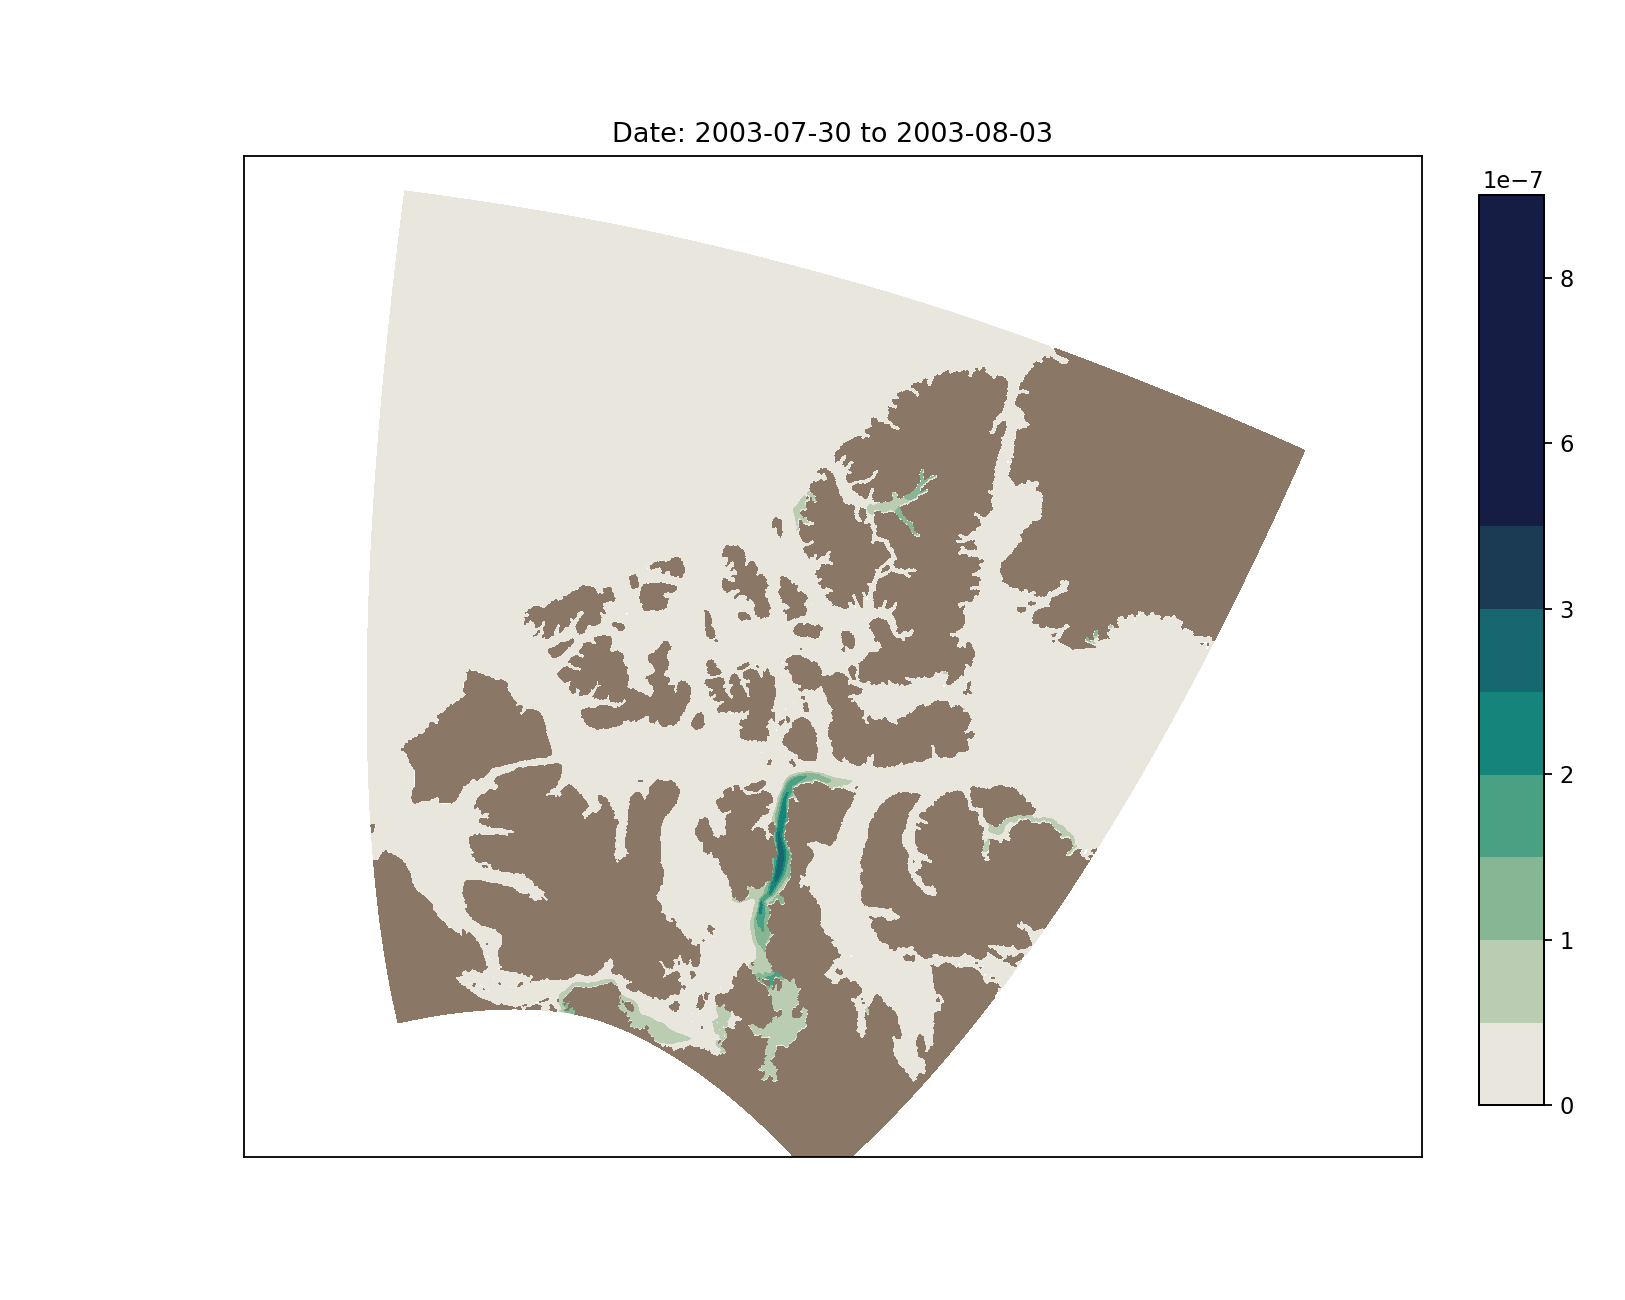

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [37]:
# Setup figure:
fig, ax1 = plt.subplots(1,1,figsize=(10,8))
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])

# Run animation:
ani = animation.FuncAnimation(fig, animate, frames=24)
ani
ani.save('/ocean/brogalla/GEOTRACES/figures/dmn_200306-09.mp4', dpi=300, fps=1.2)